Boston(42.3601° N, 71.0589° W) is located on the east coast of the US, whereas Seattle(47.6062° N, 122.3321° W) is located on the west coast. 

If we compare the weathers, this is what we see:<br>
Boston, Massachusetts <br>
Summer High: the July high is around 82.4 degrees<br>
Winter Low: the January low is 19.2<br>
Rain: averages 47.4 inches of rain a year<br>
Snow: averages 48.1 inches of snow a year<br>

Seattle, Washington <br>
Summer High: the July high is around 75.8 degrees<br>
Winter Low: the January low is 37<br>
Rain: averages 38 inches of rain a year<br>
Snow: averages 4.6 inches of snow a year<br>
Source: https://www.bestplaces.net/climate/?c1=55363000&c2=52507000<br>



# 1. Business Understanding

Since, they are located almost in the same latitude, and bost are coastal cities, it's worth comparing the cities and find out which is a better place to travel?<br>  
As we can see, **Seattle** is a slightly more comfortable place to visit. I used Airbnb data to find out travelling pattern for the cities. Let’s see what we can infer using the Airbnb data.

This projects aims to solve 4 business questions related to Boston and Seattle data.

**Question 1:** Which place is cheaper to stay? Boston or Seattle. <br>
If we compare the average housing price between Boston and Seattle, we can determine which place is cheaper.

**Question 2:** What is the best time to visit these places?<br>
We can find out the pricing change throughout the year.

**Question 3:** Which city is more popular with visitors?<br>
If we ca find out the monthly availibility of the properties throughout the year, we can answer this question. 

**Question 4:** What are the popular areas to stay and what is the recommended type of housing?<br>
We need to find out the pricing change with the property type, bedrooms, bathrooms, neighbourhood, zipcode etc to determine the popular areas. In this project I tried to find out the relation between the neighbourhood and price and review vs price.
For the second part we can investigate the relation between property type and price.

# 2. Data Understanding

In [1]:
# Import useful libraries

# for computation

import numpy as np
import pandas as pd

# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Gather the Data

There are four types of datasets used for this project. "Boston_listing.csv", "Seattle_listings.csv", "Boston_calendar.csv" and "Seattle_calendar.csv".

In [2]:
# reading the dataset
# get the data from here : http://insideairbnb.com/get-the-data.html

# Boston

boston_calendar_sep2016 = pd.read_csv('./data/Boston_calendar_sep2016.csv')
boston_calendar_oct2017 = pd.read_csv('./data/Boston_calendar_oct2017.csv')
boston_calendar_apr2018 = pd.read_csv('./data/Boston_calendar_apr2018.csv')
boston_calendar_jan2019 = pd.read_csv('./data/Boston_calendar_jan2019.csv')
boston_calendar_jan2020 = pd.read_csv('./data/Boston_calendar_jan2020.csv')
boston_listing = pd.read_csv('./data/Boston_listings_jan2020.csv')


# reading the dataset
# get the data from here : http://insideairbnb.com/get-the-data.html

# Seattle

seattle_calendar_jan2016 = pd.read_csv('./data/Seattle_calendar_jan2016.csv')
seattle_calendar_apr2018 = pd.read_csv('./data/Seattle_calendar_apr2018.csv')
seattle_calendar_jan2019 = pd.read_csv('./data/Seattle_calendar_jan2019.csv')
seattle_calendar_jan2020 = pd.read_csv('./data/Seattle_calendar_jan2020.csv')
seattle_listing = pd.read_csv('./data/Seattle_listings_jan2020.csv')


#### Assess the data

Let's look at one of the boston_calendar and one of the seattle_calnedar data first. There 4 boston_calendar data and 4 seattle_calnedar data taken at different years. Let's check the first 5 rows of one of the datasets (one for Boston one for Seattle)

In [3]:
boston_calendar_oct2017.head()

,listing_id,date,available,price
0,20872145,2018-09-22,f,NaN
1,20872145,2018-09-21,f,NaN
2,20872145,2018-09-20,f,NaN
3,20872145,2018-09-19,f,NaN
4,20872145,2018-09-18,f,NaN


In [4]:
# rows and columns
print (f"boston_calendar_oct2017 has {boston_calendar_oct2017.shape[0]} rows and {boston_calendar_oct2017.shape[1]} columns")
print ( "Columns are = ", list(boston_calendar_oct2017.columns))

boston_calendar_oct2017 has 1777550 rows and 4 columns
Columns are =  ['listing_id', 'date', 'available', 'price']


In [5]:
seattle_calendar_jan2016.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
print (f"seattle_calendar_oct2017 has {seattle_calendar_jan2016.shape[0]} rows and {seattle_calendar_jan2016.shape[1]} columns")
print ( "Columns are = ", list(seattle_calendar_jan2016.columns))

seattle_calendar_oct2017 has 1393570 rows and 4 columns
Columns are =  ['listing_id', 'date', 'available', 'price']


Which columns had no missing values? Provide a set of column names that have no missing values.

In [7]:
boston_calendar_no_nulls = set(boston_calendar_oct2017.columns[boston_calendar_oct2017.isnull().mean()==0])
boston_calendar_most_nulls = set(boston_calendar_oct2017.columns[boston_calendar_oct2017.isnull().mean() > 0.75])

print("boston_calendar data columns with no missing values \n",boston_calendar_no_nulls) #columns with no missing value
print("\nboston_calendar data columns with atleast values \n",boston_calendar_most_nulls) #columns with atleast 75% missing value

boston_calendar data columns with no missing values 
 {'listing_id', 'available', 'date'}

boston_calendar data columns with atleast values 
 set()


In [8]:
seattle_calendar_no_nulls = set(seattle_calendar_jan2016.columns[seattle_calendar_jan2016.isnull().mean()==0])
seattle_calendar_most_nulls = set(seattle_calendar_jan2016.columns[seattle_calendar_jan2016.isnull().mean() > 0.75])

print("seattle_calendar data columns with no missing values \n",seattle_calendar_no_nulls) #columns with no missing value
print("\n seattle_calendar data columns with atleast values \n",seattle_calendar_most_nulls) #columns with atleast 75% missing value

seattle_calendar data columns with no missing values 
 {'listing_id', 'available', 'date'}

 seattle_calendar data columns with atleast values 
 set()


In [9]:
boston_calendar_oct2017.available.value_counts() # Categorical values

f    1011111
t     766439
Name: available, dtype: int64

In [10]:
seattle_calendar_jan2016.available.value_counts() # Categorical values

t    934542
f    459028
Name: available, dtype: int64

As we can see, boston_calendar_oct2017 and seattle_calendar_jan2016 has no missing values in **'date', 'available', 'listing_id'** columns.<br>
**available** column has 2 categorical features **t** means available and **f** means not available.<br>
Also, the **price** column is NAN is the housing is not available.<br>
**listing_id** corresponds to host category.

Let's look at one of the boston_listing and one of the seattle_listing data

In [11]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200105171901,2020-01-05,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.29
1,8789,https://www.airbnb.com/rooms/8789,20200105171901,2020-01-05,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.36
2,10730,https://www.airbnb.com/rooms/10730,20200105171901,2020-01-05,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Bright one bed facing the golden dome of the S...,"Bright, spacious unit, new galley kitchen, new...",none,Beacon Hill is located downtown and is conveni...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.25
3,10811,https://www.airbnb.com/rooms/10811,20200105171901,2020-01-05,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,"Back Bay Studio Apt - Private bath, A/C, Cabl...",Stunning Back Bay furnished studio apartment. ...,none,A one-square mile neighborhood that is arguabl...,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,0.19
4,10986,https://www.airbnb.com/rooms/10986,20200105171901,2020-01-05,Waterfront/North End Furnished Large Studio Apt,Chic furnished studio apartment is located on ...,Waterfront Studio apt on Commercial St. Tota...,Chic furnished studio apartment is located on ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,6,6,0,0,0.05


In [12]:
print (f"boston_listing has {boston_listing.shape[0]} rows and {boston_listing.shape[1]} columns. \n")
print ( "Columns are = ", list(boston_listing.columns))

boston_listing has 3746 rows and 106 columns. 

Columns are =  ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'ameniti

In [13]:
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20200115045459,2020-01-15,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.22
1,5682,https://www.airbnb.com/rooms/5682,20200115045459,2020-01-15,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.86
2,6606,https://www.airbnb.com/rooms/6606,20200115045459,2020-01-15,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.17
3,9419,https://www.airbnb.com/rooms/9419,20200115045459,2020-01-15,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,7,0,7,0,1.28
4,9460,https://www.airbnb.com/rooms/9460,20200115045459,2020-01-15,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,"This is where Downtown meets Capitol Hill, wit...",...,t,f,moderate,f,f,4,3,1,0,3.63


In [14]:
print (f"seattle_listing has {seattle_listing.shape[0]} rows and {seattle_listing.shape[1]} columns. \n")
print ( "Columns are = ", list(seattle_listing.columns))

seattle_listing has 7869 rows and 106 columns. 

Columns are =  ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenit

As we can see in terms of number of columns, **boston_calendar and seattle_calendar** are identical. Similarly **boston_listing and seattle_listing** are identical.

Which columns had no missing values? Provide a set of column names that have no missing values.

In [15]:
boston_listing_no_nulls = set(boston_listing.columns[boston_listing.isnull().mean()==0])
boston_listing_most_nulls = set(boston_listing.columns[boston_listing.isnull().mean() > 0.75])

print("boston_listing data columns with no missing values \n",boston_listing_no_nulls) #columns with no missing value
print("\nboston_listing data columns with atleast values \n",boston_listing_most_nulls) #columns with atleast 75% missing value

boston_listing data columns with no missing values 
 {'scrape_id', 'name', 'number_of_reviews', 'cancellation_policy', 'property_type', 'experiences_offered', 'availability_30', 'calculated_host_listings_count_private_rooms', 'requires_license', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'has_availability', 'id', 'bed_type', 'instant_bookable', 'host_id', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'minimum_nights_avg_ntm', 'extra_people', 'maximum_nights', 'price', 'country', 'host_url', 'is_business_travel_ready', 'accommodates', 'picture_url', 'minimum_nights', 'calculated_host_listings_count_entire_homes', 'minimum_minimum_nights', 'require_guest_phone_verification', 'is_location_exact', 'availability_90', 'guests_included', 'country_code', 'amenities', 'listing_url', 'minimum_maximum_nights', 'availability_365', 'require_guest_profile_picture', 'latitude', 'street', 'availability_60', '

In [16]:
seattle_listing_no_nulls = set(seattle_listing.columns[seattle_listing.isnull().mean()==0])
seattle_listing_most_nulls = set(seattle_listing.columns[seattle_listing.isnull().mean() > 0.75])

print("seattle_listing data columns with no missing values \n",seattle_listing_no_nulls) #columns with no missing value
print("\n seattle_listing data columns with atleast values \n",seattle_listing_most_nulls) #columns with atleast 75% missing value

seattle_listing data columns with no missing values 
 {'scrape_id', 'name', 'host_has_profile_pic', 'number_of_reviews', 'property_type', 'experiences_offered', 'cancellation_policy', 'host_listings_count', 'availability_30', 'jurisdiction_names', 'calculated_host_listings_count_private_rooms', 'requires_license', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'neighbourhood_group_cleansed', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'has_availability', 'host_thumbnail_url', 'host_picture_url', 'id', 'bed_type', 'instant_bookable', 'host_id', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'minimum_nights_avg_ntm', 'extra_people', 'maximum_nights', 'price', 'host_is_superhost', 'country', 'host_url', 'is_business_travel_ready', 'accommodates', 'picture_url', 'minimum_nights', 'host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'host_identity_verified', 'minimum_minimum_nights', 'require_guest_phone_verification', 'is_

It's better to ignore **'monthly_price', 'neighbourhood_group_cleansed','square_feet', 'weekly_price', 'host_acceptance_rate', 'medium_url', 'thumbnail_url', 'xl_picture_url'** columns from boston_listing and seattle_listing as more than 75% values are missing. 

#### Data insight

For the first 3 business understanding questions we only need boston_calendar/seattle_calendar dataset with **available, date and price** columns.<br>
there are missing values in the price column. I will discuss how to handle with that.


For the last question, we can use **"neighbourhood_cleansed" and "price"**  and **"review_scores_rating" and "price"** columns to find out the popular areas and **"property_type" and "price"** columns to find out the recommended housing.<br>

**The good news is there are no missing values! except "review_scores_rating" :)**

# 3. Data Preparation

First, we have to remove the '$' sign of the **price** column and convert srting into float

In [17]:
# function to remove $ sign and return float

def str_to_float(string):
    """
    INPUT
    string - string of the price (ex : $250.00)
    
    OUTPUT
    float - returns float value of the price (ex: 250.0)
    """
    if string[:1] == '$':
        return float(string[1:].replace(',', ''))
    else:
        return np.nan

We can extract the month and year from the **date** column 

### Data Cleaning

### Boston/Seattle calendar data

In [18]:
# Boston 

# Sep 2016
boston_calendar_sep2016["price"] = boston_calendar_sep2016["price"].dropna().apply(str_to_float)
boston_calendar_sep2016["year"] = pd.DatetimeIndex(boston_calendar_sep2016['date']).year # exracting year
boston_calendar_sep2016["month"] = pd.DatetimeIndex(boston_calendar_sep2016['date']).month # extracting month


# Oct 2017
boston_calendar_oct2017["price"] = boston_calendar_oct2017["price"].dropna().apply(str_to_float)
boston_calendar_oct2017["year"] = pd.DatetimeIndex(boston_calendar_oct2017['date']).year
boston_calendar_oct2017["month"] = pd.DatetimeIndex(boston_calendar_oct2017['date']).month

# Apr2018
boston_calendar_apr2018["price"] = boston_calendar_apr2018["price"].dropna().apply(str_to_float)
boston_calendar_apr2018["year"] = pd.DatetimeIndex(boston_calendar_apr2018['date']).year
boston_calendar_apr2018["month"] = pd.DatetimeIndex(boston_calendar_apr2018['date']).month

# Jan 2019
boston_calendar_jan2019["price"] = boston_calendar_jan2019["price"].dropna().apply(str_to_float)
boston_calendar_jan2019["year"] = pd.DatetimeIndex(boston_calendar_jan2019['date']).year
boston_calendar_jan2019["month"] = pd.DatetimeIndex(boston_calendar_jan2019['date']).month

# Jan 2020
boston_calendar_jan2020["price"] = boston_calendar_jan2020["price"].dropna().apply(str_to_float)
boston_calendar_jan2020["year"] = pd.DatetimeIndex(boston_calendar_jan2020['date']).year
boston_calendar_jan2020["month"] = pd.DatetimeIndex(boston_calendar_jan2020['date']).month

# boston listing
boston_listing["price"] = boston_listing["price"].apply(str_to_float) 


# Seattle

# Jan 2016

seattle_calendar_jan2016["price"] = seattle_calendar_jan2016["price"].dropna().apply(str_to_float)

seattle_calendar_jan2016["year"] = pd.DatetimeIndex(seattle_calendar_jan2016['date']).year

seattle_calendar_jan2016["month"] = pd.DatetimeIndex(seattle_calendar_jan2016['date']).month



# Apr2018

seattle_calendar_apr2018["price"] = seattle_calendar_apr2018["price"].dropna().apply(str_to_float)

seattle_calendar_apr2018["year"] = pd.DatetimeIndex(seattle_calendar_apr2018['date']).year

seattle_calendar_apr2018["month"] = pd.DatetimeIndex(seattle_calendar_apr2018['date']).month



# Jan 2019

seattle_calendar_jan2019["price"] = seattle_calendar_jan2019["price"].dropna().apply(str_to_float)

seattle_calendar_jan2019["year"] = pd.DatetimeIndex(seattle_calendar_jan2019['date']).year

seattle_calendar_jan2019["month"] = pd.DatetimeIndex(seattle_calendar_jan2019['date']).month



# Jan 2020

seattle_calendar_jan2020["price"] = seattle_calendar_jan2020["price"].dropna().apply(str_to_float)

seattle_calendar_jan2020["year"] = pd.DatetimeIndex(seattle_calendar_jan2020['date']).year

seattle_calendar_jan2020["month"] = pd.DatetimeIndex(seattle_calendar_jan2020['date']).month

# Seattle listing
seattle_listing["price"] = seattle_listing["price"].apply(str_to_float)

Our plan is to see how much the yearly average pricing has changed from the year 2016-2020 and investigate any general trend. <br>

Let's extract the yearly data from the above dataset. We only need **year ,month, available, and price** columns


We are going to filter the Boston/Seattle data w.r.t year(2017-2020 for Boston and 2016,2018-2020 for seattle as 2017 was not available in Airbnb database)


In [19]:
# Boston

# Year 2017
boston_2017_p1 = boston_calendar_sep2016[boston_calendar_sep2016["year"] == 2017]
boston_2017_p2 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2017]

boston_2017 = pd.concat([boston_2017_p1,boston_2017_p2], axis = 0)
boston_2017 = boston_2017[["year" ,"month", "available" ,"price"]]

# Year 2018
boston_2018_p1 = boston_calendar_oct2017[boston_calendar_oct2017["year"] == 2018]
boston_2018_p2 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2018]

boston_2018 = pd.concat([boston_2018_p1,boston_2018_p2], axis = 0)
boston_2018 = boston_2018[["year" ,"month", "available" ,"price"]]

# Year 2019
boston_2019_p1 = boston_calendar_apr2018[boston_calendar_apr2018["year"] == 2019]
boston_2019_p2 = boston_calendar_jan2019[boston_calendar_jan2019["year"] == 2019]

boston_2019 = pd.concat([boston_2019_p1,boston_2019_p2], axis = 0)
boston_2019 = boston_2019[["year" ,"month", "available" ,"price"]]

# Year 2020
boston_2020_p1 = boston_calendar_jan2019[boston_calendar_jan2019["year"] == 2020]
boston_2020_p2 = boston_calendar_jan2020[boston_calendar_jan2020["year"] == 2020]

boston_2020 = pd.concat([boston_2020_p1,boston_2020_p2], axis = 0)
boston_2020 = boston_2020[["year" ,"month", "available" ,"price"]]

# Seattle

# Year 2016
seattle_2016 = seattle_calendar_jan2016[seattle_calendar_jan2016["year"] == 2016]
seattle_2016 = seattle_2016[["year" ,"month", "available" ,"price"]]

# Year 2018
seattle_2018 = seattle_calendar_apr2018[seattle_calendar_apr2018["year"] == 2018]

seattle_2018 = seattle_2018[["year" ,"month", "available" ,"price"]]

# Year 2019
seattle_2019_p1 = seattle_calendar_apr2018[seattle_calendar_apr2018["year"] == 2019]
seattle_2019_p2 = seattle_calendar_jan2019[seattle_calendar_jan2019["year"] == 2019]

seattle_2019 = pd.concat([seattle_2019_p1,seattle_2019_p2], axis = 0)
seattle_2019 = seattle_2019[["year" ,"month", "available" ,"price"]]

# Year 2020
seattle_2020_p1 = seattle_calendar_jan2019[seattle_calendar_jan2019["year"] == 2020]
seattle_2020_p2 = seattle_calendar_jan2020[seattle_calendar_jan2020["year"] == 2020]

seattle_2020 = pd.concat([seattle_2020_p1,seattle_2020_p2], axis = 0)
seattle_2020 = seattle_2020[["year" ,"month", "available" ,"price"]]

### Handling categorical values in Boston/Seattle calendar data ("available" column)

Since **available** column has 2 values "t"(available) and "f"(not-available) Let's expand the **available** column using one-hot encoding

In [20]:
# Boston

# 2017
boston_one_hot_2017 = pd.get_dummies(boston_2017['available'])
boston_2017 = boston_2017.join(boston_one_hot_2017)

# 2018
boston_one_hot_2018 = pd.get_dummies(boston_2018['available'])
boston_2018 = boston_2018.join(boston_one_hot_2018)

#2019
boston_one_hot_2019 = pd.get_dummies(boston_2019['available'])
boston_2019 = boston_2019.join(boston_one_hot_2019)

#2020
boston_one_hot_2020 = pd.get_dummies(boston_2020['available'])
boston_2020 = boston_2020.join(boston_one_hot_2020)


# Seattle

# 2016
seattle_one_hot_2016 = pd.get_dummies(seattle_2016['available'])
seattle_2016 = seattle_2016.join(seattle_one_hot_2016)

# 2018
seattle_one_hot_2018 = pd.get_dummies(seattle_2018['available'])
seattle_2018 = seattle_2018.join(seattle_one_hot_2018)

#2019
seattle_one_hot_2019 = pd.get_dummies(seattle_2019['available'])
seattle_2019 = seattle_2019.join(seattle_one_hot_2019)

#2020
seattle_one_hot_2020 = pd.get_dummies(seattle_2020['available'])
seattle_2020 = seattle_2020.join(seattle_one_hot_2020)

This will create two new columns **t** and **f** where, **t** = 1 means the housing is available and **f** = 1 means it's not available 

### Merge the calendar data¶

Finally we will merge all all boston and seattle calendar data as **boston_total** and **seattle_total** respectively

In [21]:
boston_total = pd.concat([boston_2017,boston_2018,boston_2019,boston_2020], axis = 0)

seattle_total = pd.concat([seattle_2016,seattle_2018,seattle_2019,seattle_2020], axis = 0)

In [22]:
# Free up some memory


boston_calendar_sep2016 = []
boston_calendar_oct2017 = []
boston_calendar_apr2018 = []
boston_calendar_jan2019 = []
boston_calendar_jan2020 = []

boston_one_hot_2017 = []
boston_one_hot_2018 = []
boston_one_hot_2019 = []
boston_one_hot_2020 = []
boston_2017 = []
boston_2018 = []
boston_2019 = []
boston_2020 = []

# Free up some memory


seattle_calendar_sep2016 = []
seattle_calendar_apr2018 = []
seattle_calendar_jan2019 = []
seattle_calendar_jan2020 = []

seattle_one_hot_2016 = []
seattle_one_hot_2019 = []
seattle_one_hot_2020 = []
seattle_2018 = []
seattle_2019 = []

### Handling missing values

Let's see how much missing values does boston_total and seattle_total's  **price** has, since this is the only column with missing values
Also, boston_listing and seattle_listing has **review_scores_rating** which can be used to find recommended housing. We have to look for missing values in this column as well.

In [23]:
boston_missing_value = boston_total.price.isnull().mean()
seattle_missing_value = seattle_total.price.isnull().mean()

boston_review_missing_value = boston_listing.review_scores_rating.isnull().mean()
seattle_review_missing_value = seattle_listing.review_scores_rating.isnull().mean()

print(f"boston_total has {boston_missing_value*100 : .2f}% missing value in the price column")
print(f"seattle_total has {seattle_missing_value*100 : .2f}% missing value in the price column")

print(f"boston_listing has {boston_review_missing_value*100 : .2f}% missing value in the review_scores_rating column")
print(f"seattle_listing has {seattle_review_missing_value*100 : .2f}% missing value in the review_scores_rating column")

boston_total has  37.62% missing value in the price column
seattle_total has  24.03% missing value in the price column
boston_listing has  20.29% missing value in the review_scores_rating column
seattle_listing has  13.75% missing value in the review_scores_rating column


Since both **boston_total and seattle_total "price"** columns  have less than 40% missing values and we will mostly work with average price, it's safe to just **drop** the corresponding rows whenever necessary.<br>
Similarly both **boston_listing and seattle_listing "review_scores_rating"** columns have less than 20% missing values and we will mostly work with average price, it's safe to just **drop** the corresponding rows whenever necessary.<br>
The only disadvantage will be, we'll have lesser data points. One possible solution could be to download more data from Airbnb wesite. But we have enough dataset to usderstand the general trend 

#### Boston/Seattle listing data

we only need the **"neighbourhood_cleansed","property_type" and "price"** columns for this project. So let's just pick those and drop the rest. These columns have no missing values!

In [24]:
boston_listing = boston_listing[["neighbourhood_cleansed","property_type", "price",'review_scores_rating' ]]
seattle_listing = seattle_listing[["neighbourhood_cleansed","property_type", "price",'review_scores_rating']]

## 4. Analysis, Modeling, Visualization

We can ask 4 business questions from the data. Answer to each question can be analyzed through visualization

## Question 1: Which place is cheaper to stay? Boston or Seattle.

To answer this question I downloaded the Boston and Seattle data for the past few years and calculated the average pricing for each year. The following figures explain it.

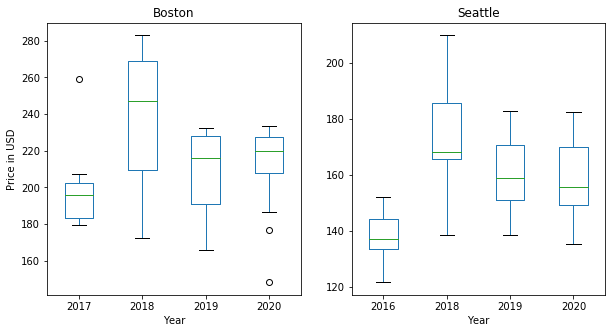

In [25]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))
seattle_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Seattle", ax = axes[1]);
boston_total.groupby(["month","year"]).price.mean().unstack().plot(kind='box',title = "Boston",ax = axes[0]);
axes[0].set_ylabel("Price in USD")
axes[0].set_xlabel("Year");
axes[1].set_xlabel("Year");
#plt.savefig('avg_price.png')

The graph shows the mean price and spread of price (standard diviation) for each year

In [26]:
# Average housing price in Boston by year
boston_total.groupby(["year"]).price.mean()

year
2017    195.516520
2018    245.643596
2019    205.925102
2020    208.232248
Name: price, dtype: float64

In [27]:
# Average housing price in Seattle by year
seattle_total.groupby(["year"]).price.mean()

year
2016    137.951375
2018    178.924106
2019    159.397455
2020    158.401441
Name: price, dtype: float64

So, from the above graph we can see that Seattle is cheaper to visit. For the past two years the average price of seattle is **159 dollars** whereas, the average price of Boston is **206 dollars**

## Question 2: What is the best time to visit these places?

To address this question, we have to look into the availability of Airbnb housing and price change during the season.

In [28]:
# average price of boston from 2017-2020
print (f"average price of boston from 2017-2020 is {boston_total.price.mean() :.0f} USD")

# average price of seattle from 2016-2020
print (f"average price of seattle from 2016-2020 is {seattle_total.price.mean() :.0f} USD")       

average price of boston from 2017-2020 is 216 USD
average price of seattle from 2016-2020 is 159 USD


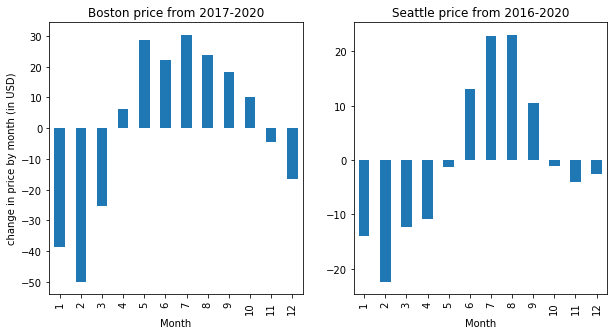

In [29]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))

(boston_total.groupby(["month"]).price.mean() - boston_total.price.mean()).plot(kind='bar', title = "Boston price from 2017-2020",ax = axes[0])
(seattle_total.groupby(["month"]).price.mean() - seattle_total.price.mean()).plot(kind='bar', title = "Seattle price from 2016-2020",ax = axes[1])
axes[0].set_ylabel("change in price by month (in USD)");
axes[0].set_xlabel("Month");
axes[1].set_xlabel("Month");
#plt.savefig('price_change.png')

Here 0 means the **216 USD** for **Boston**. Anything more above 0 means more expensive during that month <br>
Here 0 means the **159 USD** for **Seattle**. Anything more above 0 means more expensive during that month

From this graph, we can see that since Boston has more extreme weather compared to Seattle, Boston has more price variation. Also, from the end of spring to the end of fall (March — November), Boston Airbnb's price is higher than average. So for Boston, **May and July** should be avoided if you want to save money. **March and November** are the best months to visit. During the winter season, **February** has the least price.<br>
Similarly for Seattle, **July and August** should be avoided and **February** is the cheapest month of the year. From spring to the end of fall **March, April, May, October, and November** are the best months to visit.

## Question 3: Which city is more popular and what is the ideal time to visit?

### Average occupancy

In [30]:
# Average yearly occupancy of Boston (in percentage)

boston_total.groupby(["year"]).f.mean() * 100

year
2017    50.920629
2018    58.750468
2019    62.719612
2020    52.666338
Name: f, dtype: float64

In [31]:
# Average yearly occupancy of Seattle (in percentage)

seattle_total.groupby(["year"]).f.mean() * 100

year
2016    32.980647
2018    63.092975
2019    64.274842
2020    59.549681
Name: f, dtype: float64

In [32]:
# average price of boston from 2017-2020
print (f"average occupancy of boston from 2017-2020 is {boston_total.f.mean()*100 :.0f} %") # f = 1 means occupied

# average price of seattle from 2016-2020
print (f"average 0ccupancy of seattle from 2016-2020 is {seattle_total.f.mean()*100 :.0f} %") # f = 1 means occupied   

average occupancy of boston from 2017-2020 is 58 %
average 0ccupancy of seattle from 2016-2020 is 59 %


Over the last few years, the average occupancy of Boston and Seattle is 58% and 59% respectively. which suggests that Seattle is more popular among visitors. So what time people usually try to visit these cities?

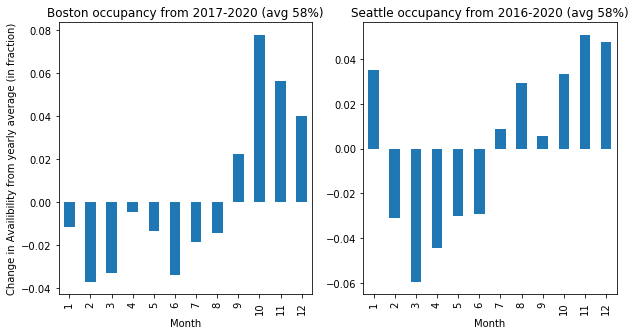

In [33]:
figure, axes = plt.subplots(1, 2,figsize=(10,5))

(boston_total.groupby(["month"]).f.mean() - boston_total.f.mean()).plot(kind='bar',title = "Boston occupancy from 2017-2020 (avg 58%)",ax = axes[0]);


(seattle_total.groupby(["month"]).f.mean() - seattle_total.f.mean()).plot(kind='bar',title = "Seattle occupancy from 2016-2020 (avg 58%)",ax = axes[1]);
axes[0].set_ylabel("Change in Availibility from yearly average (in fraction)");
axes[0].set_xlabel("Month");
axes[1].set_xlabel("Month");
#plt.savefig('accupancy.png')

As we can see, during early winter Boston is more occupied than the yearly average (more than 4% of the yearly average).<br>
Seattle has more occupancy in **January** and from **July — December**, which also suggests Seattle being more popular among the two.


## Question 4: What are the popular areas to stay and what is the recommended type of housing?

### where are most of the hosts located in Boston?

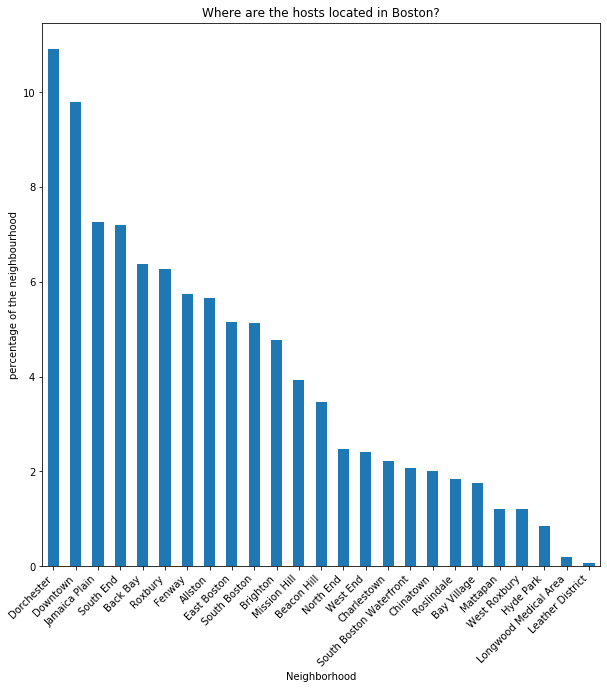

In [34]:
plt.figure(figsize = (10,10))
host_loc = boston_listing.neighbourhood_cleansed.value_counts()

(host_loc*100/boston_listing.neighbourhood_cleansed.value_counts().dropna().sum()).plot(kind="bar");
plt.ylabel('percentage of the neighbourhood')
plt.xlabel( "Neighborhood")
plt.title("Where are the hosts located in Boston?");
plt.xticks(rotation=45, ha='right');
#plt.savefig('most_host.png')

In [35]:
boston_host_loc = seattle_listing.neighbourhood_cleansed.value_counts() # number of properties by neighbourhood

boston_host_loc[:6].sum()/boston_listing.neighbourhood_cleansed.value_counts().dropna().sum() # fraction of properties in the first 5 neighbourhood

0.5344367325146824

As we can see from the above graph the more that roughly 50% of the hosing is located in **Dorchester, Downtown, Jamaica Plain, South End, and Back Bay** <br>

### So what are the recommended neighborhoods in Boston?


If 75% of the hosts in each neighbourhood are rated more than 8, that neighbourhood can be recommended.

We can check the rating of these neighbourhoods and find out which neighbourhood has ratings more than 80 out of 100 and we can filter out places with less than 70/100 rating.

In [36]:
above_80 = boston_listing[boston_listing['review_scores_rating'] > 80.0] #data with review above 80/100 rating 
below_70 = boston_listing[boston_listing['review_scores_rating'] < 70.0] #data with review less than 70/100 rating 

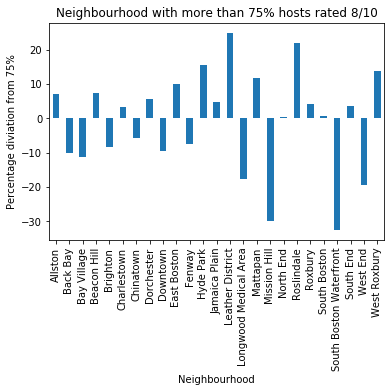

In [37]:
host_loc80 = above_80.neighbourhood_cleansed.value_counts()
(host_loc80*100/host_loc - 75).dropna().plot(kind="bar");
plt.ylabel('Percentage diviation from 75%')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with more than 75% hosts rated 8/10");
#plt.savefig('recomended_palce.png')

Here 0 marks the neighborhood with 75% of the hosts. Above 0 are the recommended places.

From the graph above the recommended properties are **Allston, Beacon Hill, Charlestown, Dorchester, East Boston, Hyde Park, Jamaica Plain, Leather District, Mattapan, North End, Roslindale, Roxbury, South Boston, South End, West Roxbury.** <br>
If you prefer a popular neighbourhood, **Jamaica Plain, Dorchester, and South End** is recommended. <br>
In terms of rating, most places in **Hyde Park, Leather District, Mattapan, Roslindale, West Roxbury** are highly rated, but further research is needed since these places have lesser number of hosts.


### Which places should be avoided in Boston?

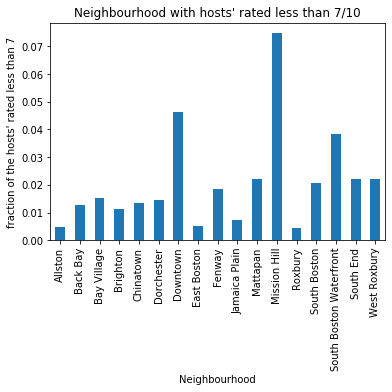

In [38]:
host_loc70 = below_70.neighbourhood_cleansed.value_counts()
(host_loc70/host_loc).dropna().plot(kind="bar");
plt.ylabel('fraction of the hosts\' rated less than 7')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with hosts' rated less than 7/10");
#plt.savefig('avoid.png')

From the graph above We can see that **Downtown and Misson Hill** have the most number of hosts' with less than 7 rating. So these places should be avoided.

### What is the recommended type of housing in Boston?

Property type vs Price

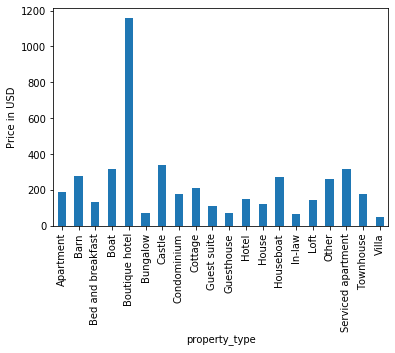

In [39]:
(boston_listing.groupby(["property_type"]).price.mean()).dropna().plot(kind='bar');
plt.ylabel('Price in USD');
#plt.savefig('recomended_housing.png')

If our goal is to save money, then we see that **Bungalow, Guesthouse, In-law, and Villa** are among the cheaper options to stay in Boston (Costs $150 or less).

#### Similar analysis on Seattle

#### where are most of the hosts located in seattle?

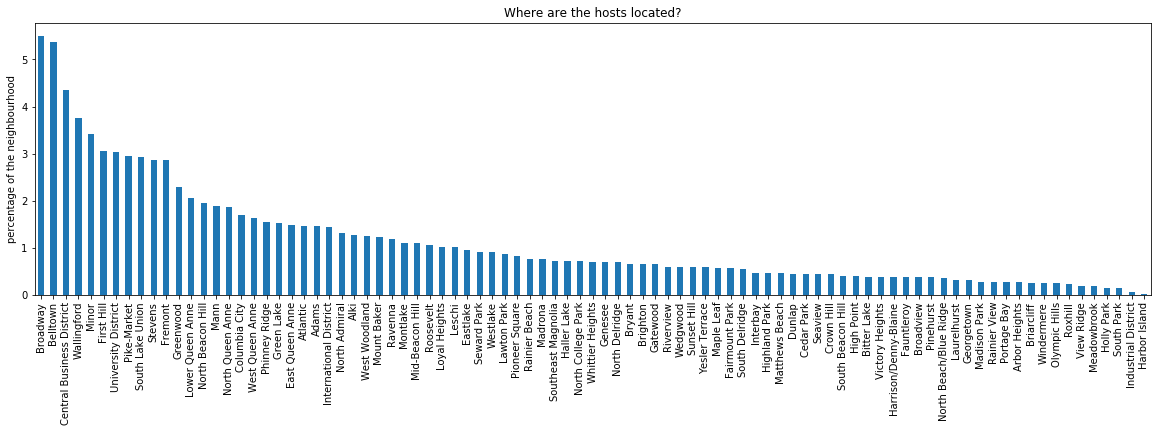

In [40]:
plt.figure(figsize=(20,5))

seattle_host_loc = seattle_listing.neighbourhood_cleansed.value_counts().dropna()

(seattle_host_loc*100/seattle_listing.neighbourhood_cleansed.value_counts().dropna().sum()).plot(kind="bar");
plt.ylabel('percentage of the neighbourhood')
plt.title("Where are the hosts located?");

In [41]:
seattle_host_loc[:16].sum()/seattle_listing.neighbourhood_cleansed.value_counts().dropna().sum() # fraction of properties in the first 15 neighbourhood

0.5010801880798068

First 15 neighbourhoods has 50% of the hosts

As we can see from above graph top 50% neighbourhoods are located in **Broadway, Belltown, Central Business District, Wallingford, and Minor,First Hill, Univeristy District, Pike-Market, ..**


#### So what is the recomended neighbourhood in Seattle?

In [42]:
seattle_above_80 = seattle_listing[seattle_listing['review_scores_rating'] > 80.0]
seattle_below_70 = seattle_listing[seattle_listing['review_scores_rating'] < 70.0]

We can check the rating of these neighbourhoods and find out which neighbourhood has ratings more than 80 out of 100 and we can filter out places with less than 70/100 rating.

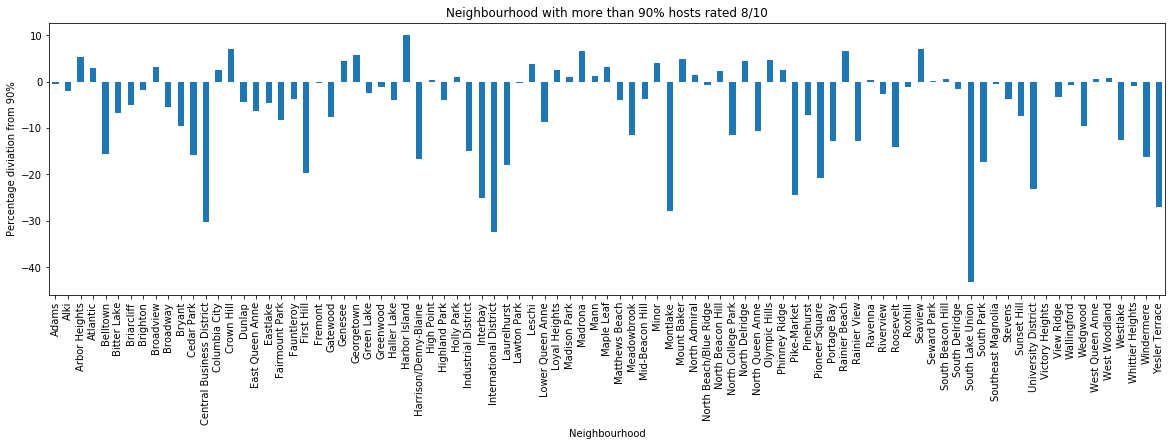

In [43]:
plt.figure(figsize=(20,5))
seattle_host_loc80 = seattle_above_80.neighbourhood_cleansed.value_counts().dropna()
(seattle_host_loc80*100/seattle_host_loc - 90).dropna().plot(kind="bar");
plt.ylabel('Percentage diviation from 90%')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with more than 90% hosts rated 8/10");

Here 0 marks the neighborhood with 90% of the hosts. Above 0 are the recommended places.

In [44]:
#More than 95% housing reted 8/10
[(seattle_host_loc80*100/seattle_host_loc - 95).index[i] for i, value in enumerate(seattle_host_loc80*100/seattle_host_loc - 95) if value > 0]

['Arbor Heights',
 'Crown Hill',
 'Georgetown',
 'Harbor Island',
 'Madrona',
 'Rainier Beach',
 'Seaview']

Seattle is more spread out than Boston, and most of the neighbourhood is highly rated. <br>
If 90% of the hosts in each neighbourhood are rated more than 8, that neighbourhood can be rocomended. So the recomended properties are **Arbor Heights, Atlantic, Broadview, Columbia City, Crown Hill, Fremont,Genesee,Georgetown, Harbor Island,Leschi,Loyal Heights,Madison Park,Madrona,Mann,Maple Leaf,Mount Baker,North Admiral,North Beacon Hill,North Delridge,Olympic Hills, Phinney Ridge,Rainier Beach,Ravenna, Seaview, Seward Park,South Beacon Hill,Victory Heights, West Queen Anne, and West Woodland** <br>
If you prefer poplular neighbourhood, **Fremont, North Beacon Hill, and Mann** is recomended. <br>
In terms of rating, most places in **Arbor Heights,Crown Hill,Georgetown,Harbor Island,Madrona,Rainier Beach,Seaview** are highly rated, but further research is needed since these palecs have leeser number of hosts.

From the graph below We can see that **International District,Montlake, South Park, and View Ridge** have the most number of hosts with less than 7 rating. So these places should be avoided.

#### Which places should be avoided in Seattle?

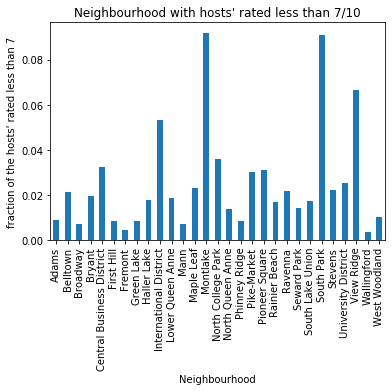

In [45]:
seattle_host_loc70 = seattle_below_70.neighbourhood_cleansed.value_counts()
(seattle_host_loc70/seattle_host_loc).dropna().plot(kind="bar");
plt.ylabel('fraction of the hosts\' rated less than 7')
plt.xlabel('Neighbourhood')
plt.title("Neighbourhood with hosts' rated less than 7/10");

Property_type vs Price


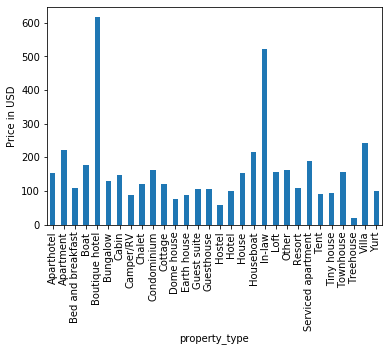

In [46]:
(seattle_listing.groupby(["property_type"]).price.mean()).dropna().plot(kind='bar');
plt.ylabel('Price in USD');

From the graph above we see that **Camper/RV, Dome house, Hostel, and Treehouse** are among the cheaper options to stay in Seattle (Costs less than $100). 

## 5. Evaluation

Let's put all the questions and answers togather and dicuss the the final remarks.

---

### Question 1: Which place is cheaper to stay? Boston or Seattle.

**Seattle** is cheaper to visit. For the past two years the average price of seattle is **159 dollars** whereas, the average price of Boston is **206 dollars**.

---

### Question 2: What is the best time to visit these places?

From the end of spring to the end of fall (March — November), Boston Airbnb's price is higher than average. So for Boston, **May and July** should be avoided if you want to save money. **March and November** are the best months to visit. During the winter season, **February** has the least price.<br>
Similarly for Seattle, **July and August** should be avoided and **February** is the cheapest month of the year. From spring to the end of fall **March, April, May, October, and November** are the best months to visit.

---

### Question 3: Which city is more popular and what is the ideal time to visit?

Over the last few years, the average occupancy of Boston and Seattle is 58% and 59% respectively. which suggests that Seattle is slightly more popular among visitors. <br>
During early winter Boston is more occupied than the yearly average (more than 4% of the yearly average).<br>
Seattle has more occupancy in **January** and from **July — December**.

---

### Question 4: What are the popular areas to stay and what is the recommended type of housing?

**Bosoton:**

The recommended properties are **Allston, Beacon Hill, Charlestown, Dorchester, East Boston, Hyde Park, Jamaica Plain, Leather District, Mattapan, North End, Roslindale, Roxbury, South Boston, South End, West Roxbury.** <br>
If you prefer a popular neighbourhood, **Jamaica Plain, Dorchester, and South End** is recommended. <br>
In terms of rating, most places in **Hyde Park, Leather District, Mattapan, Roslindale, West Roxbury** are highly rated, but further research is needed since these places have lesser number of hosts.<br>
**Downtown and Misson Hill** have the most number of hosts' with less than 7 rating. So these places should be **avoided**.
If our goal is to save money, then we see that **Bungalow, Guesthouse, In-law, and Villa** are among the cheaper options to stay in Boston (Costs $150 or less).

**Seattle:**

the recommended properties are **Arbor Heights, Atlantic, Broadview, Columbia City, Crown Hill, Fremont, Genesee, Georgetown, Harbor Island, Leschi, Loyal Heights, Madison Park, Madrona, Mann, Maple Leaf, Mount Baker, North Admiral, North Beacon Hill, North Delridge, Olympic Hills, Phinney Ridge, Rainier Beach, Ravenna, Seaview, Seward Park, South Beacon Hill, Victory Heights, West Queen Anne, and West Woodland** <br>
If you prefer a popular neighborhood, **Fremont, North Beacon Hill, and Mann** are recommended. 
Most places in **Arbor Heights, Crown Hill, Georgetown, Harbor Island, Madrona, Rainier Beach, Seaview** are highly rated, but further research is needed since these places have a lesser number of hosts.
We can see that **Montlake, South Park, and View Ridge** have the most number of hosts with less than 7 ratings. So these places should be **avoided**.<br>
We see that **Camper/RV, Dome house, Hostel, and Treehouse** are among the cheaper options to stay in Seattle (Costs less than $100).

